<a href="https://www.kaggle.com/code/martinab/titanic-eda?scriptVersionId=113935886" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Titanic

<img src='https://cdn.britannica.com/72/153172-050-EB2F2D95/Titanic.jpg' width=900 align='center'/>

### Introduction 

Titanic was a British passenger liner that sank in the North Atlantic Ocean in 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making it one of modern history's deadliest commercial marine disasters during peacetime.

The dataset we are going to work with contains demographics and passenger information from 891 passengers and crew on board of the Titanic. 

The Titanic dataset has the following attributes:

PassengerId: Unique identifier for passengers
Survived: Survival (0 = No; 1 = Yes)
Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Name: Name
Sex: Sex
Age: Age
SibSp: Number of Siblings/Spouses Aboard
Parch: Number of Parents/Children Aboard
Ticket: Ticket Number
Fare: Passenger Fare
Cabin: Cabin
Embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### Import Libraries 

In [1]:
# Importing pandas and Series + DataFrame:
import pandas as pd
from pandas import Series, DataFrame

# Importing numpy, matplotlib and seaborn:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To hide warnings
import warnings
warnings.filterwarnings('ignore')

### Import the Data 

The following code loads data from our csv file into jupyter notebook and sets it as a DataFrame:

In [2]:
titanic_df = pd.read_csv('../input/train.csv')

Explore your dataset:

In [3]:
# A short preview of our data from Titanic file (displays first 5 rows):
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# To display basic stats for columns filled in with numerical values:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

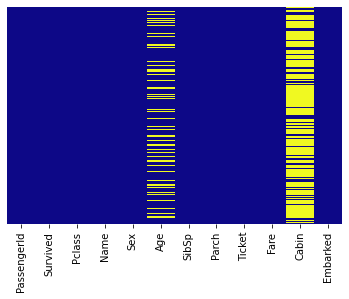

In [5]:
# Heatmap for visualising missing data:
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap = 'plasma')

In our Titanic dataset we have missing data in Age and Cabin columns.

### Data Cleaning

Looking at the visualisation above - heatmap, we can see that some values, such as age and cabin are missing. We will try to estimate those missing values and add them to our dataset.

##### Filling in Missing Age values

In [6]:
print('Number of rows where Age data is missing: ' + str(titanic_df.Age.isnull().sum()))
print('Percentage of Age data missing: ' + str(titanic_df.Age.isnull().sum()/len(titanic_df.Age)*100))

Number of rows where Age data is missing: 177
Percentage of Age data missing: 19.865319865319865


Our first data filling will be related to the passengers' age. We will use groupped data for Sex, Pclass and Title. This should give us more accurate ages, than just simply filling NaN values with the average age of known ages. 

In the next step we will show that we have 17 different titles used in names and try to map them to 6 main categories: Mr, Miss, Mrs, Master, Officer and Royalty.

In [7]:
# What are different titles on the board of Titanic?
titanic_df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip()).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [8]:
# We create new feature 'Title' in our dataset, and we map our 17 titles to 6 main categories:
titanic_df['Title'] = titanic_df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [9]:
# Normalise the titles:
normalised_titles = {'Mr':'Mr', 'Mrs':'Mrs', 'Miss':'Miss', 'Master':'Master', 'Don':'Royalty', 'Rev':'Officer', 
                     'Dr':'Officer', 'Mme':'Mrs', 'Ms':'Mrs', 'Major':'Officer', 'Lady':'Royalty', 'Sir':'Royalty',  
                     'Mlle':'Miss', 'Col':'Officer', 'Capt':'Officer', 'the Countess':'Royalty', 'Jonkheer':'Royalty',
                     'Dona':'Royalty'}

In [10]:
# Map normalised titles to the current titles:
titanic_df['Title'] = titanic_df['Title'].map(normalised_titles)

In [11]:
# Check the new column 'Title' in titanic dataset: 
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [12]:
print(titanic_df['Title'].value_counts())

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64


There are 177 NaN values for passengers' age. We will now try to estimate those missing values, by using groupped data and averages.

In [13]:
# Group by Sex, Pclass and title:
group = titanic_df.groupby(['Sex', 'Pclass', 'Title'])

In [14]:
# To display mediang age by the groupped features:
group['Age'].median()

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        40.0
                Officer    49.0
                Royalty    40.5
        2       Miss       24.0
                Mrs        31.5
        3       Miss       18.0
                Mrs        31.0
male    1       Master      4.0
                Mr         40.0
                Officer    51.0
                Royalty    40.0
        2       Master      1.0
                Mr         31.0
                Officer    46.5
        3       Master      4.0
                Mr         26.0
Name: Age, dtype: float64

In [15]:
# Fill in the NaN age values by group median values:
titanic_df['Age'] = group['Age'].apply(lambda x: x.fillna(x.median()))

##### Setting Binary Values for Sex Column 

KEY:<br>
0 - male <br>
1 - female

For data visualisation we will keep male/female description in the Sex column, but this can be set later.

In [16]:
# Convert male and female groups to integer form:
# titanic_df['Sex'] = titanic_df['Sex'].map({'male':0, 'female':1})

##### Filling in Missing Cabin Values

In [17]:
print('Number of rows where Cabin data is missing: ' + str(titanic_df.Cabin.isnull().sum()))
print('Percentage of Cabin data missing: ' + str(titanic_df.Cabin.isnull().sum()/len(titanic_df.Cabin)*100))

Number of rows where Cabin data is missing: 687
Percentage of Cabin data missing: 77.10437710437711


Because the percentage of mising Cabin data is quite high, we can drop the column from our dataframe titanic_df instead of filling it in.

In [18]:
titanic_df = titanic_df.drop(['Cabin'], axis = 1)

<AxesSubplot:>

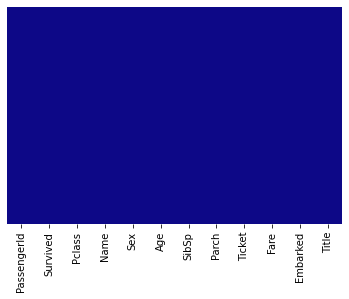

In [19]:
# Visualising missing data with heatmap:
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap = 'plasma')

We now have no data missing and can go to explore our dataset further.

### Exploratory Data Analysis (EDA) 

##### Who were the passengers on the Titanic?

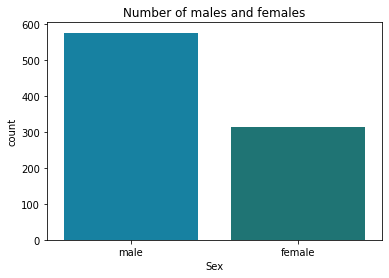

In [20]:
# Bar chart of total male and female passengers on the board:
plt.figure(figsize=(6,4))
sns.countplot(x = 'Sex', data=titanic_df,  palette = 'winter_d')
plt.title('Number of males and females')
plt.show()

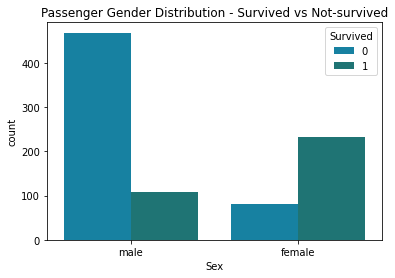

In [21]:
# Bar chart of male and female, split into survived/not survived:
plt.figure(figsize=(6,4))
sns.countplot(x = 'Sex', hue = 'Survived', data=titanic_df, palette = 'winter_d')
plt.title('Passenger Gender Distribution - Survived vs Not-survived')
plt.show()

The bar charts above show that there are almost twice as many males on board as females. However, females have a better chance of survival.

##### Age Feature 

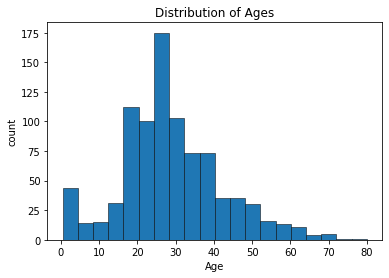

In [22]:
# Distribution of ages (we will drop rows with no data in Age column):
plt.figure(figsize=(6,4))
plt.hist(titanic_df['Age'].dropna(), bins=20, edgecolor = 'black', linewidth = 0.5)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

In [23]:
# Returns the average age of Titanic passenger:
mean = titanic_df['Age'].mean()
print('The average age of a passenger on Titanic was: ', mean)

The average age of a passenger on Titanic was:  29.1382379349046


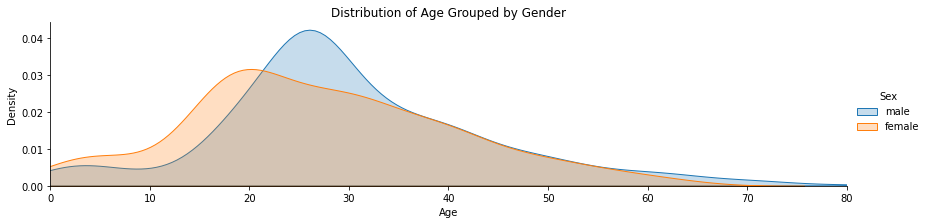

In [24]:
# Distribution of ages grouped by gender
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

In [25]:
# Adding a new column 'Age Group':
def age_group(passenger):
    Age, Sex = passenger
    
    if Age < 5:
        return '0-4'
    elif Age < 10:
        return '5-9'
    elif Age < 20:
        return '10-19'
    elif Age < 30:
        return '20-29'
    elif Age < 40:
        return '30-39'
    elif Age < 50:
        return '40-49'
    elif Age < 60:
        return '50-50'
    elif Age < 70:
        return '60-69'
    else:
        return '70+'

In [26]:
# Add new column Age Groups into titanic dataset: 
titanic_df['Age Groups'] = titanic_df[['Age', 'Sex']].apply(age_group, axis = 1)

In [27]:
# Check the changes by displaying first 5 rows of the dataset: 
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age Groups
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,20-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,30-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,20-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,30-39
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,30-39


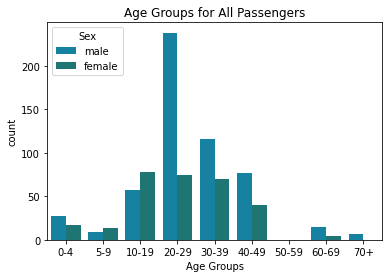

In [28]:
# Bar chart of 'Age Groups' and 'Sex':
plt.figure(figsize=(6,4))
sns.countplot(x = 'Age Groups', hue = 'Sex', data=titanic_df,  palette = 'winter_d', 
              order = ['0-4','5-9','10-19','20-29','30-39','40-49','50-59','60-69','70+'])
plt.title('Age Groups for All Passengers')
plt.show()

In [29]:
# Returns counts of 'age groups' split into defined categories: 
titanic_df['Age Groups'].value_counts()

20-29    312
30-39    186
10-19    135
40-49    117
50-50     49
0-4       44
5-9       22
60-69     19
70+        7
Name: Age Groups, dtype: int64

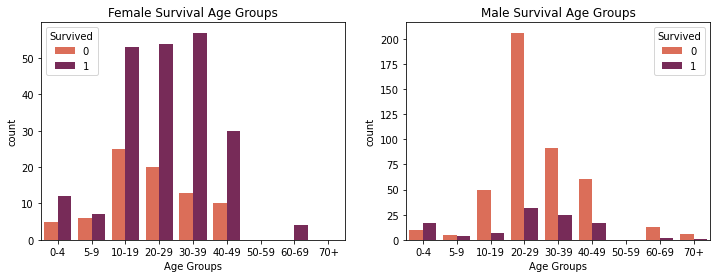

In [30]:
# Bar chart of 'Age Groups' and 'Sex' for both males and females:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.countplot(x = 'Age Groups', hue = 'Survived', data = titanic_df[titanic_df.Sex == 'female'],
              palette = 'rocket_r', 
              order = ['0-4','5-9','10-19','20-29','30-39','40-49','50-59','60-69','70+'])
plt.title('Female Survival Age Groups')

plt.subplot(122)
sns.countplot(x = 'Age Groups', hue = 'Survived', data = titanic_df[titanic_df.Sex == 'male'],  palette = 'rocket_r', 
              order = ['0-4','5-9','10-19','20-29','30-39','40-49','50-59','60-69','70+'])
plt.title('Male Survival Age Groups')

plt.show()

Exploring the age feature shows us that females on the board of Titanic had a higher chance of survival than males.

##### Embarked Feature 

Embark = port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [31]:
# How many people embarked in each of the ports?
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
# How many passengers of each class embarked in C, Q, and S port?
emb = titanic_df.groupby(['Embarked', 'Pclass'])
emb.Pclass.sum()

Embarked  Pclass
C         1           85
          2           34
          3          198
Q         1            2
          2            6
          3          216
S         1          127
          2          328
          3         1059
Name: Pclass, dtype: int64

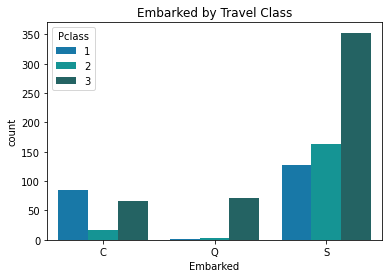

In [33]:
# Embarked split into travel class: 

plt.figure(figsize = (6,4))
sns.countplot('Embarked', data=titanic_df, hue='Pclass', palette = 'winter_d', order = ['C','Q','S'])
plt.title('Embarked by Travel Class')
plt.show()

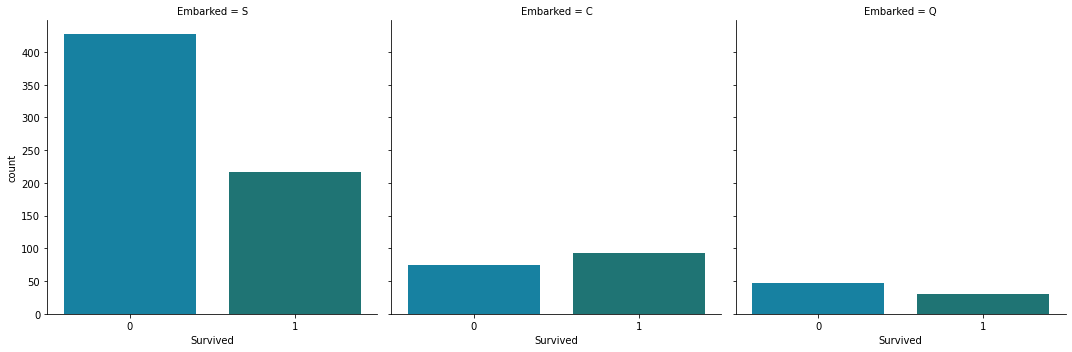

In [34]:
# Is there any relationship between embarked and survival?
sns.catplot(data = titanic_df, x = 'Survived', col = 'Embarked', kind = 'count', palette = 'winter_d')

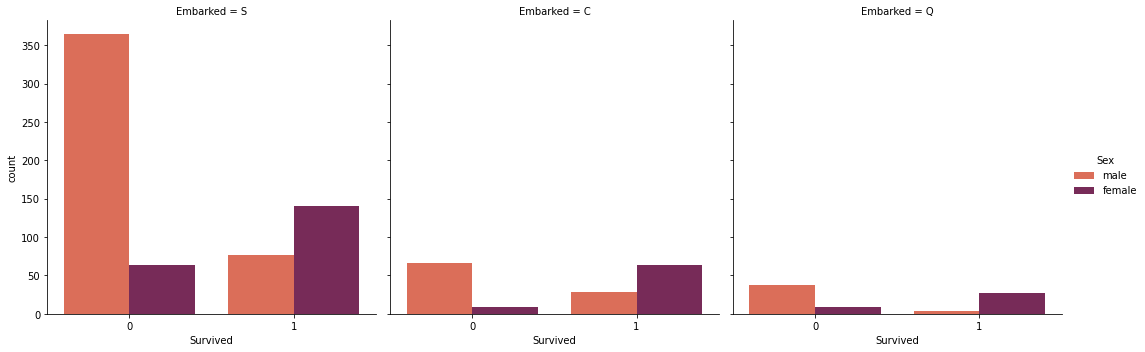

In [35]:
sns.catplot(data = titanic_df, x = 'Survived', hue = 'Sex',  col = 'Embarked', kind = 'count', palette = 'rocket_r')

It seems like people who embarked in Southampton had higher survival rate than those who embarked in other two ports. 

##### Fare Feature

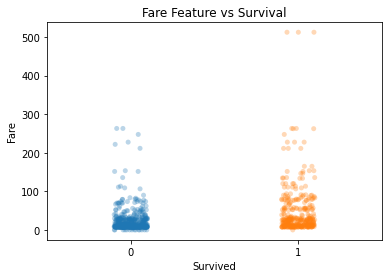

In [36]:
plt.figure(figsize = (6,4))
sns.stripplot(data = titanic_df, x='Survived', y='Fare', alpha=0.3, jitter=True)
plt.title('Fare Feature vs Survival')
plt.show()

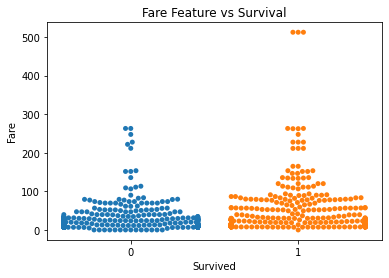

In [37]:
plt.figure(figsize = (6,4))
sns.swarmplot(data = titanic_df, x = 'Survived', y = 'Fare')
plt.title('Fare Feature vs Survival')
plt.show()

There is a weak correlation between fare and survival.

######  What is the chance that a woman in her 30's with a 2nd class ticket survives? 

In [38]:
# Create a crosstab with Age Groups, Pclass, Sex and Survived categories:
pd.crosstab([titanic_df.Sex, titanic_df.Survived], 
            [titanic_df['Age Groups'], titanic_df.Pclass],
             margins=True).style.background_gradient(cmap='autumn_r')


In [39]:
chance = round(16/17*100, 2)
print(print("The chance that a woman in her 30's with a 2nd class ticket survies is: " , chance,'%'))

The chance that a woman in her 30's with a 2nd class ticket survies is:  94.12 %
None


##### Which variable has the highest impact when considering the likelihood of survival? 

We can obtain this information from correlation. We will create a heatmap to show correlation between our variables/features:

In [40]:
# We can drop PassengerId, as this is only for ML purpose created feature.
titanic = titanic_df.drop(['PassengerId'], axis = 1)

In [41]:
# Change sex column to binary values 0 and 1: 
titanic['Sex'] = titanic['Sex'].map({'male':0, 'female':1})

Text(0.5, 1.0, 'Correlation for Titanic Features')

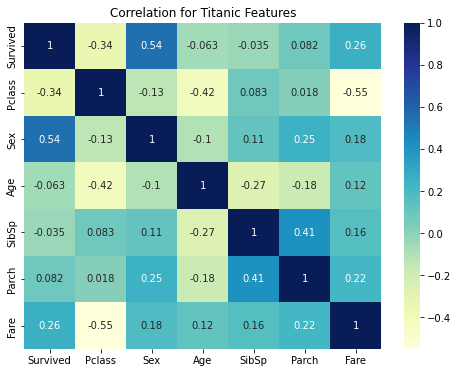

In [42]:
# Correlation between all features:

plt.figure(figsize = (8,6))
sns.heatmap(titanic.corr(), annot=True, cmap='YlGnBu', linecolor="white")

# Adding title to the heatmap:
plt.title('Correlation for Titanic Features')

The variable that has the highest impact on a likelihood of survival is 'Sex', followed by 'Pclass' and 'Fare'.